# Efficient Data Stream Anomaly Detection 

## Anomaly Detection Using Moving Average and Standard Deviation: Algorithm Explanation

### Overview
The chosen method for detecting anomalies in the continuous data stream is based on a **Moving Average** and **Standard Deviation** approach. This method is widely used for its simplicity and effectiveness in identifying outliers in time series data.

### Algorithm Description
1. **Moving Average**: The moving average smooths the data by averaging a specified number of previous data points (the window size). This helps mitigate noise and allows us to observe underlying trends in the data.
  
2. **Standard Deviation**: For each moving average value, calculated the standard deviation of the data points within the same window. The standard deviation provides a measure of how much the data varies from the mean within that window.

3. **Anomaly Detection**: An anomaly is flagged if the difference between the current data point and the moving average exceeds a predefined threshold (in terms of standard deviations). This means that if a data point deviates significantly from the expected value (i.e., the moving average), it is considered an anomaly.

### Rationale for Choosing This Algorithm
- **Simplicity**: The moving average and standard deviation approach is straightforward to implement and understand. This is particularly useful for quick prototypes and clear visualizations.
  
- **Adaptability**: It can easily adapt to changes in the data (concept drift) by adjusting the window size. Larger windows smooth the data more but may miss short-term anomalies, while smaller windows are more sensitive to changes.

- **Interpretability**: The results are easy to interpret, as we can visually see how the moving average and thresholds interact with the data points.

### Limitations of Other Methods
While there are various algorithms for anomaly detection, I chose not to implement them for the following reasons:

1. **Isolation Forest**: Although effective for high-dimensional data, this algorithm requires more computational resources and is not as straightforward to visualize in real-time scenarios.

2. **Statistical Tests (e.g., Z-score)**: These can be sensitive to the underlying distribution of data. If the data is not normally distributed, these tests might yield misleading results. Our approach provides a more flexible framework that is robust against variations.

3. **Machine Learning Approaches (e.g., Neural Networks)**: While these methods can provide high accuracy, they require extensive training data and parameter tuning, making them less suitable for quick implementations and real-time analysis.

4. **Dynamic Thresholds**: Some methods utilize dynamic thresholds based on historical data patterns. However, these can be complex to implement and interpret, and they may not perform well in rapidly changing environments.

## Conclusion
The moving average and standard deviation method strikes a balance between complexity and effectiveness for real-time anomaly detection in data streams. Its interpretability and adaptability make it a strong choice for this application, particularly in environments where quick implementation and responsiveness are crucial.

## Imports

- **NumPy**: This library is used for numerical computations. It provides support for arrays and mathematical functions, which are crucial for simulating the data stream and performing statistical calculations.
- **Matplotlib**: This library is used for plotting and visualizing the data. It helps create graphs to illustrate the data stream and any detected anomalies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters for the data stream simulation

- **STREAM_LENGTH**: The total number of data points in the simulated stream.
- **NORMAL_MEAN** and **NORMAL_STD_DEV**: Define the mean and standard deviation for generating normal data points.
- **ANOMALY_MEAN** and **ANOMALY_STD_DEV**: Define the mean and standard deviation for generating anomaly data points.

In [2]:
STREAM_LENGTH = 1000
NORMAL_MEAN = 50
NORMAL_STD_DEV = 5
ANOMALY_MEAN = 100
ANOMALY_STD_DEV = 1

## Function to Simulate a Data Stream

### This function generates a continuous data stream with normal values and introduces anomalies at a specified rate.

- **Purpose**: This function simulates a data stream that contains both normal values and occasional anomalies.
- **Logic**:
    - It checks if the input length is positive. If not, it raises an error.
    - It generates a list of data points. For each point, it generates a normal value based on the defined mean and standard deviation.
    - There’s a 5% chance that the generated value will instead be an anomaly, using a different mean and standard deviation.
- **Output**: Returns a list of simulated data points.

In [3]:
def simulate_data_stream(length):
    """Simulate a continuous data stream with anomalies."""
    if length <= 0:
        raise ValueError("Length of the data stream must be a positive integer.")
    
    data_stream = []
    for _ in range(length):
        # Generate normal data
        value = np.random.normal(NORMAL_MEAN, NORMAL_STD_DEV)
        # Introduce anomalies occasionally
        if np.random.rand() < 0.05:  # 5% chance of anomaly
            value = np.random.normal(ANOMALY_MEAN, ANOMALY_STD_DEV)
        data_stream.append(value)
    
    return data_stream

## Anomaly Detection Using Moving Average

### This function detects anomalies by comparing current data points against a moving average and standard deviation.

- **Purpose**: This function identifies anomalies in the data stream using a moving average and standard deviation approach.
- **Logic**:
    - Validates the input data and parameters.
    - Computes the moving average over a specified window size using convolution.
    - Computes the standard deviation for each window of the data.
    - Flags an anomaly if the absolute difference between the current data point and the moving average exceeds a specified number of standard deviations (threshold).
- **Output**: Returns a list of anomalies, each represented by its index and value.

In [4]:
def detect_anomalies(data, window_size=20, threshold=3):
    """Detect anomalies using moving average and standard deviation."""
    if not isinstance(data, list) or len(data) == 0:
        raise ValueError("Input data must be a non-empty list.")
    if window_size <= 0 or threshold <= 0:
        raise ValueError("Window size and threshold must be positive integers.")

    anomalies = []
    moving_avg = np.convolve(data, np.ones(window_size) / window_size, mode='valid')
    moving_std = [np.std(data[i:i + window_size]) for i in range(len(data) - window_size + 1)]
    
    for i in range(len(moving_avg)):
        if np.abs(data[i + window_size - 1] - moving_avg[i]) > threshold * moving_std[i]:
            anomalies.append((i + window_size - 1, data[i + window_size - 1]))  # Store index and value of anomaly
    return anomalies

## Visualization of Results

### This function visualizes the data stream and highlights the detected anomalies.

- **Purpose**: This function visualizes the data stream and highlights the detected anomalies.
- **Logic**:
    - Validates the input stream.
    - Plots the entire data stream as a blue line.
    - If anomalies are detected, it marks them on the plot with red dots.
    - It also adds horizontal lines representing the upper and lower thresholds for easy reference.
- **Output**: Displays a plot of the data stream and anomalies.

In [5]:
def visualize_data(stream, anomalies):
    """Visualize the data stream and detected anomalies."""
    if not isinstance(stream, list) or len(stream) == 0:
        raise ValueError("Input stream must be a non-empty list.")
    
    plt.figure(figsize=(14, 7))
    plt.plot(stream, label='Data Stream', color='blue')
    
    # Mark anomalies
    if anomalies:
        anomaly_indices, anomaly_values = zip(*anomalies)
        plt.scatter(anomaly_indices, anomaly_values, color='red', label='Anomalies', zorder=5)
    
    plt.title('Data Stream with Anomalies Detected')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.axhline(y=NORMAL_MEAN + 3 * NORMAL_STD_DEV, color='green', linestyle='--', label='Upper Threshold')
    plt.axhline(y=NORMAL_MEAN - 3 * NORMAL_STD_DEV, color='orange', linestyle='--', label='Lower Threshold')
    plt.legend()
    plt.grid()
    plt.show()

## Main Function to Run the Project

### This block executes the data simulation, anomaly detection, and visualization.

- **Purpose**: This block serves as the entry point for executing the project.
- **Logic**:
    - Calls the simulate_data_stream function to create the data stream.
    - Detects anomalies in the simulated data.
    - Visualizes the results.
    - Catches and prints any value errors encountered during execution.
- **Output**: Executes the full workflow of simulating data, detecting anomalies, and visualizing the results.

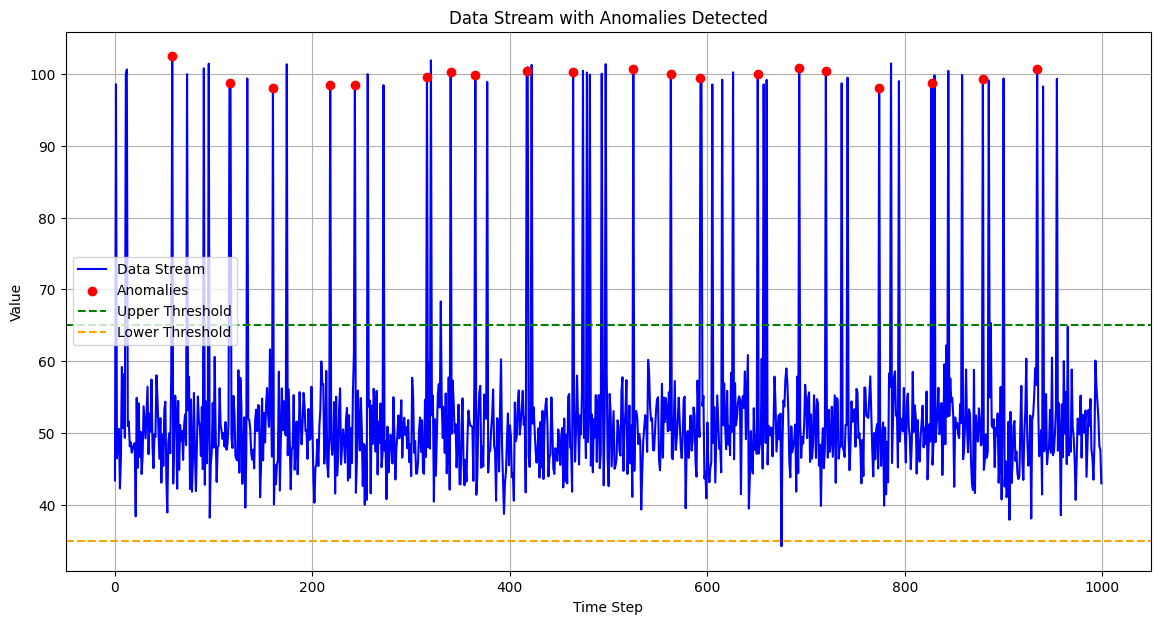

In [6]:
if __name__ == "__main__":
    try:
        # Simulate data stream
        data_stream = simulate_data_stream(STREAM_LENGTH)
        
        # Detect anomalies
        anomalies = detect_anomalies(data_stream)
        
        # Visualize results
        visualize_data(data_stream, anomalies)
    except ValueError as e:
        print(f"Error: {e}")